# Setup

In [1]:
%config Completer.use_jedi = False

In [235]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import joblib

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

import statsmodels.formula.api as sm 

import requests
from selenium import webdriver
import chromedriver_binary
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as ec
from bs4 import BeautifulSoup

In [3]:
sns.set_style('dark')

# Data Import

In [231]:
df = pd.read_excel('data/Tray - SaaS products.xlsx')

In [5]:
df.nunique()

API                      199
Analyst value (0 - 5)      6
Partner value (0 - 5)      6
Persona value (0 - 5)      6
Growing market             2
Competitive gap            1
Organic Search Volume    148
SEO Value (0 - 3)          4
dtype: int64

In [6]:
# Competitive gap column is a categorical column with only one unique value.
df = df.drop('Competitive gap', axis = 1)

## Feature Correlation

In [7]:
corr = df.iloc[:,:-1].corr('spearman')
corr.style.background_gradient(cmap='coolwarm')

,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Growing market,Organic Search Volume
Analyst value (0 - 5),1.000000,-0.016439,-0.010163,0.053816,0.046263
Partner value (0 - 5),-0.016439,1.000000,0.001943,-0.001423,-0.106402
Persona value (0 - 5),-0.010163,0.001943,1.000000,0.002930,-0.066732
Growing market,0.053816,-0.001423,0.002930,1.000000,-0.017357
Organic Search Volume,0.046263,-0.106402,-0.066732,-0.017357,1.000000


In [8]:
corr = df.iloc[:,:-1].corr('pearson')
corr.style.background_gradient(cmap='coolwarm')

,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Growing market,Organic Search Volume
Analyst value (0 - 5),1.000000,-0.023980,-0.016264,0.054732,0.052947
Partner value (0 - 5),-0.023980,1.000000,0.009003,-0.008014,-0.127154
Persona value (0 - 5),-0.016264,0.009003,1.000000,0.017866,-0.050980
Growing market,0.054732,-0.008014,0.017866,1.000000,-0.055398
Organic Search Volume,0.052947,-0.127154,-0.050980,-0.055398,1.000000


# Getting APIs that are already being served

In [10]:
options = Options()
options.binary_location = '/usr/bin/google-chrome'
#options.add_argument('--no-sandbox')
#Run without generating browser.
options.add_argument("--headless")
#Instantiating webdriver
driver = webdriver.Chrome(options=options, executable_path='/usr/bin/chromedriver')
#Accessing URL
driver.get("https://tray.io/documentation/connectors/service/")

In [11]:
cards = driver.find_elements_by_tag_name('span')
apis = []
for card in cards:
    apis.append(card.text)
apis = apis[8:-6]

In [12]:
apis_proc = [api.lower().replace(' ', '') for api in apis]

In [13]:
serving = []
for api in df['API']:
    if api.lower().replace(' ', '') in apis_proc:
        serving.append(True)
    else:
        serving.append(False)

In [14]:
df['serving'] = serving

In [15]:
df.to_csv('file1.csv') 

In [16]:
df[df['serving']].to_csv('Tray.csv') 

In [19]:
df = pd.read_excel('data/Tray - SaaS products.xlsx')
df = df.drop('Competitive gap', axis = 1)
df['serving'] = serving

In [20]:
np.sum(serving)

34

/home/byungjae/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/byungjae/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/byungjae/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

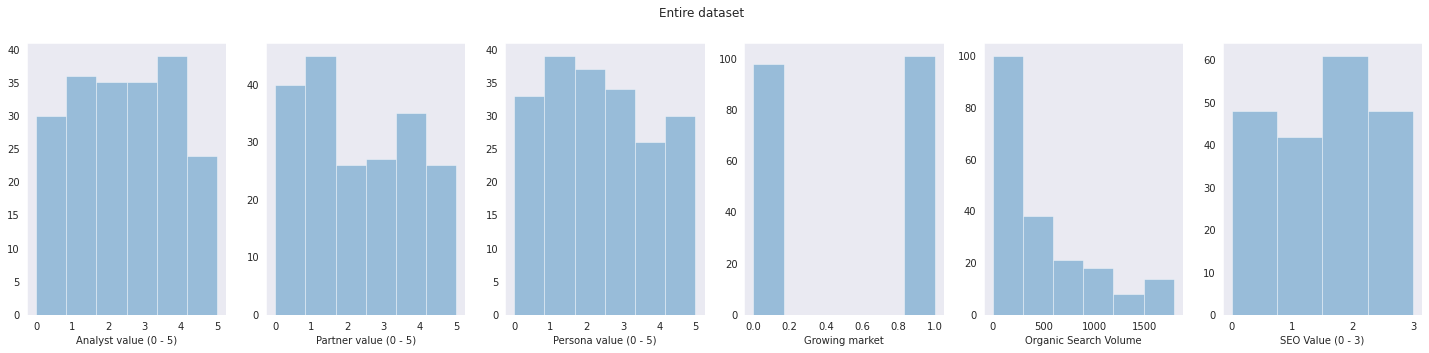

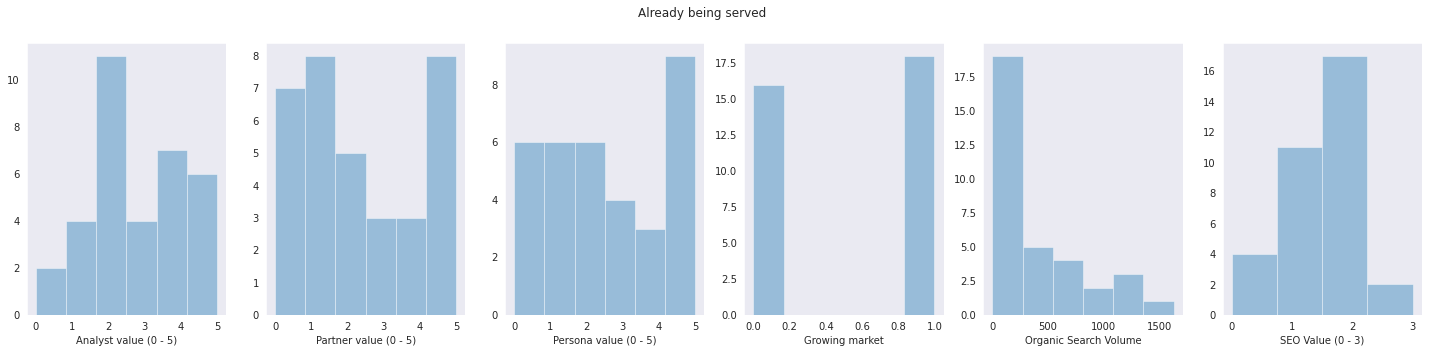

In [21]:
fig, axs = plt.subplots(1, 6, figsize = (25, 5))
fig.suptitle('Entire dataset')
axs = axs.flatten()
for ax, col in zip(axs, df.columns[1:-1]):
    if col == 'SEO Value (0 - 3)':
        sns.distplot(df[col], ax = ax, bins = 4, kde=False)
    else:
        sns.distplot(df[col], ax = ax, bins = 6, kde=False)
        
        
fig, axs = plt.subplots(1, 6, figsize = (25, 5))
fig.suptitle('Already being served')
axs = axs.flatten()
for ax, col in zip(axs, df.columns[1:-1]):
    if col == 'SEO Value (0 - 3)':
        sns.distplot(df[df['serving'] == True][col], ax = ax, bins = 4, kde=False)
    else:
        sns.distplot(df[df['serving'] == True][col], ax = ax, bins = 6, kde=False)

In [22]:
df.describe()

,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Organic Search Volume,SEO Value (0 - 3)
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,2.447236,2.251256,2.356784,467.231156,1.547739
std,1.625547,1.731230,1.672216,505.378173,1.103933
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,10.500000,1.000000
50%,2.000000,2.000000,2.000000,291.000000,2.000000
75%,4.000000,4.000000,4.000000,790.500000,2.000000
max,5.000000,5.000000,5.000000,1783.000000,3.000000


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


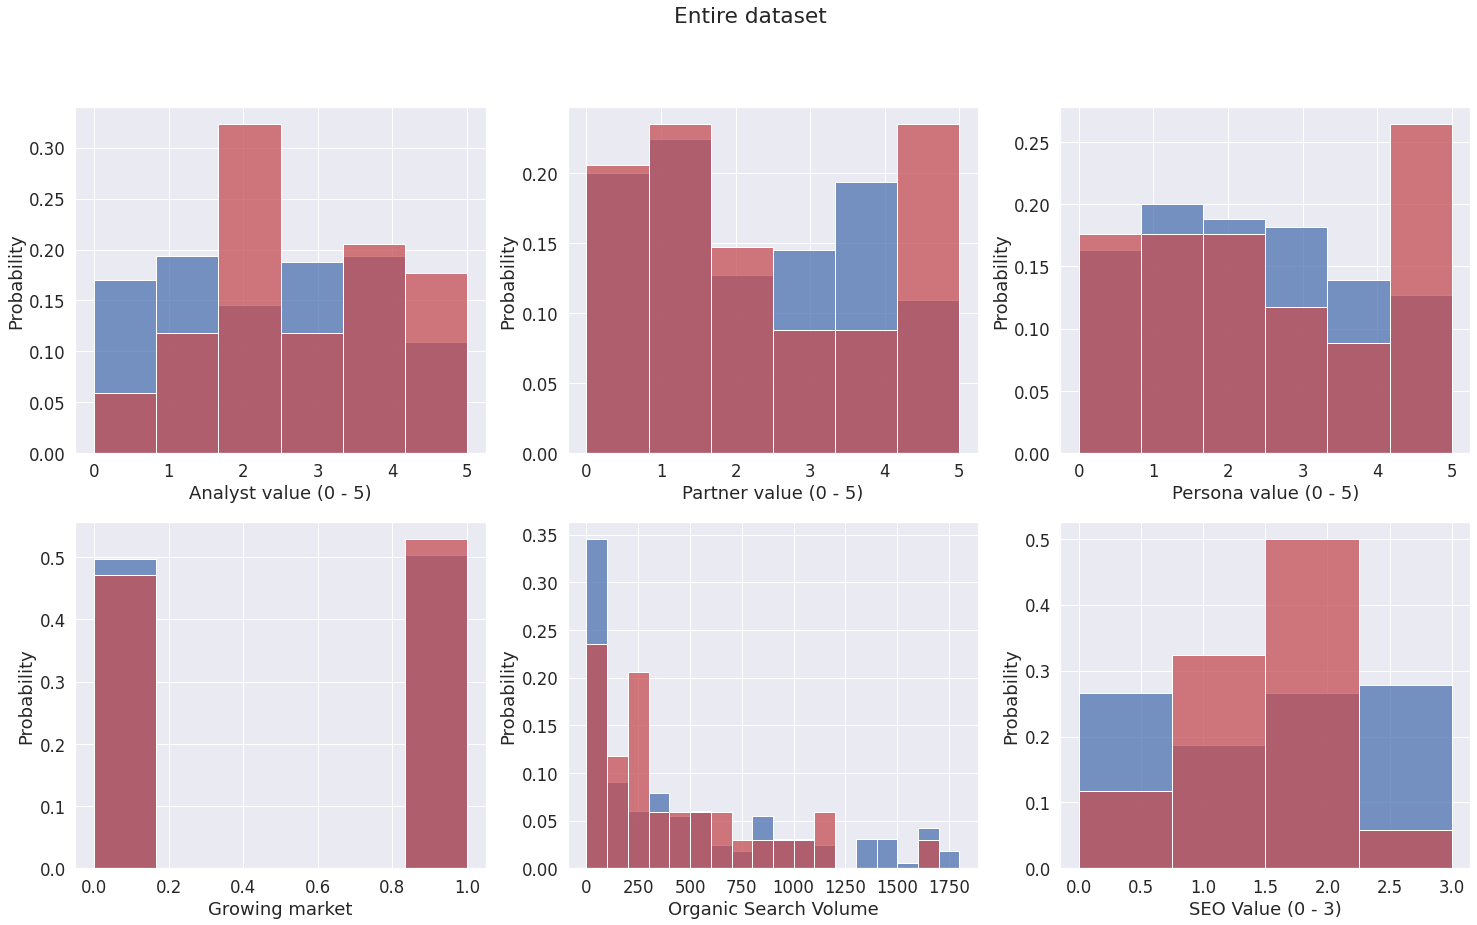

In [222]:
fig, axs = plt.subplots(2, 3, figsize = (25, 14))
fig.suptitle('Entire dataset')
axs = axs.flatten()
for ax, col in zip(axs, df.columns[1:-1]):
    sns.set(font_scale = 1.5)
    if col == 'SEO Value (0 - 3)':
        sns.histplot(data = df[df['serving']==False], x = col, ax = ax, bins = 4, kde=False, stat='probability', )
        sns.histplot(data = df[df['serving']], x = col, ax = ax, bins = 4, kde=False, stat='probability', color='r')
    elif col == 'Organic Search Volume':
        sns.histplot(data = df[df['serving']==False], x = col, ax = ax, bins = 18, kde=False, stat='probability', binwidth=100)
        sns.histplot(data = df[df['serving']], x = col, ax = ax, bins = 18, kde=False, stat='probability', binwidth=100, color='r')        
    else:
        sns.histplot(data = df[df['serving']==False], x = col, ax = ax, bins = 6, kde=False, stat='probability')
        sns.histplot(data = df[df['serving']], x = col, ax = ax, bins = 6, kde=False, stat='probability', color='r')

In [33]:
df.describe()

,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Organic Search Volume,SEO Value (0 - 3)
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,2.447236,2.251256,2.356784,467.231156,1.547739
std,1.625547,1.731230,1.672216,505.378173,1.103933
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,10.500000,1.000000
50%,2.000000,2.000000,2.000000,291.000000,2.000000
75%,4.000000,4.000000,4.000000,790.500000,2.000000
max,5.000000,5.000000,5.000000,1783.000000,3.000000


In [24]:
df[df['serving']].describe()

,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Organic Search Volume,SEO Value (0 - 3)
count,34.000000,34.000000,34.000000,34.000000,34.00000
mean,2.823529,2.323529,2.558824,412.411765,1.50000
std,1.506965,1.902480,1.877961,409.409191,0.78817
min,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,1.000000,1.000000,163.250000,1.00000
50%,2.500000,2.000000,2.000000,244.500000,2.00000
75%,4.000000,4.000000,4.750000,606.000000,2.00000
max,5.000000,5.000000,5.000000,1629.000000,3.00000


# K-means clustering

## Scaling

In [34]:
df.head(2)

,API,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Growing market,Organic Search Volume,SEO Value (0 - 3),serving
0,15Five,0,1,3,False,1161,2,False
1,1Password,5,1,0,True,395,2,False


In [35]:
# minmax sclaer
X = df[['Analyst value (0 - 5)', 'Partner value (0 - 5)',
       'Persona value (0 - 5)', 'Growing market', 'Organic Search Volume',
       'SEO Value (0 - 3)']]
mm_scaler = MinMaxScaler()
X_scl = mm_scaler.fit_transform(X)

## Elbow Plot

In [36]:
inertia = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, 
                    random_state = 42)
    kmeans.fit(X_scl)
    inertia.append(kmeans.inertia_)

inertia_ is the sum of squared distances of samples to their closest cluster center


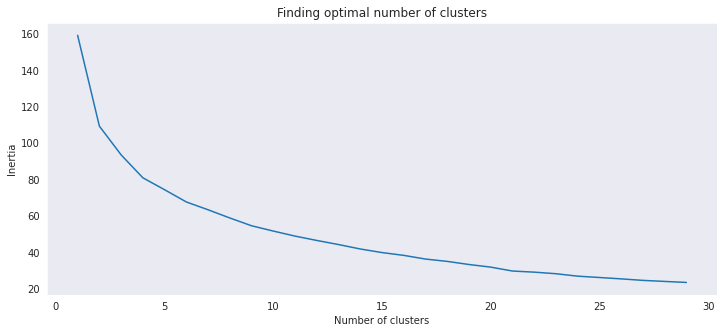

In [37]:
plt.figure(figsize = (12, 5))
plt.plot(range(1, 30),inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Finding optimal number of clusters');
print('inertia_ is the sum of squared distances of samples to their closest cluster center')

In [38]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
y_kmeans = kmeans.fit_predict(X_scl)

In [39]:
df_scl = pd.DataFrame(X_scl)
df_scl.columns = X.columns
df_scl['Cluster'] = pd.Series(y_kmeans)
df_scl['serving'] = serving

In [40]:
np.unique(np.array(df_scl['Cluster']), return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([46, 40, 28, 52, 33]))

## Visualisation

In [41]:
# All possible pairs in List 
# Using list comprehension + enumerate() 
col_pairs = [(a, b) for idx, a in enumerate(df_scl.columns[:-1]) for b in X.columns[idx + 1:]] 

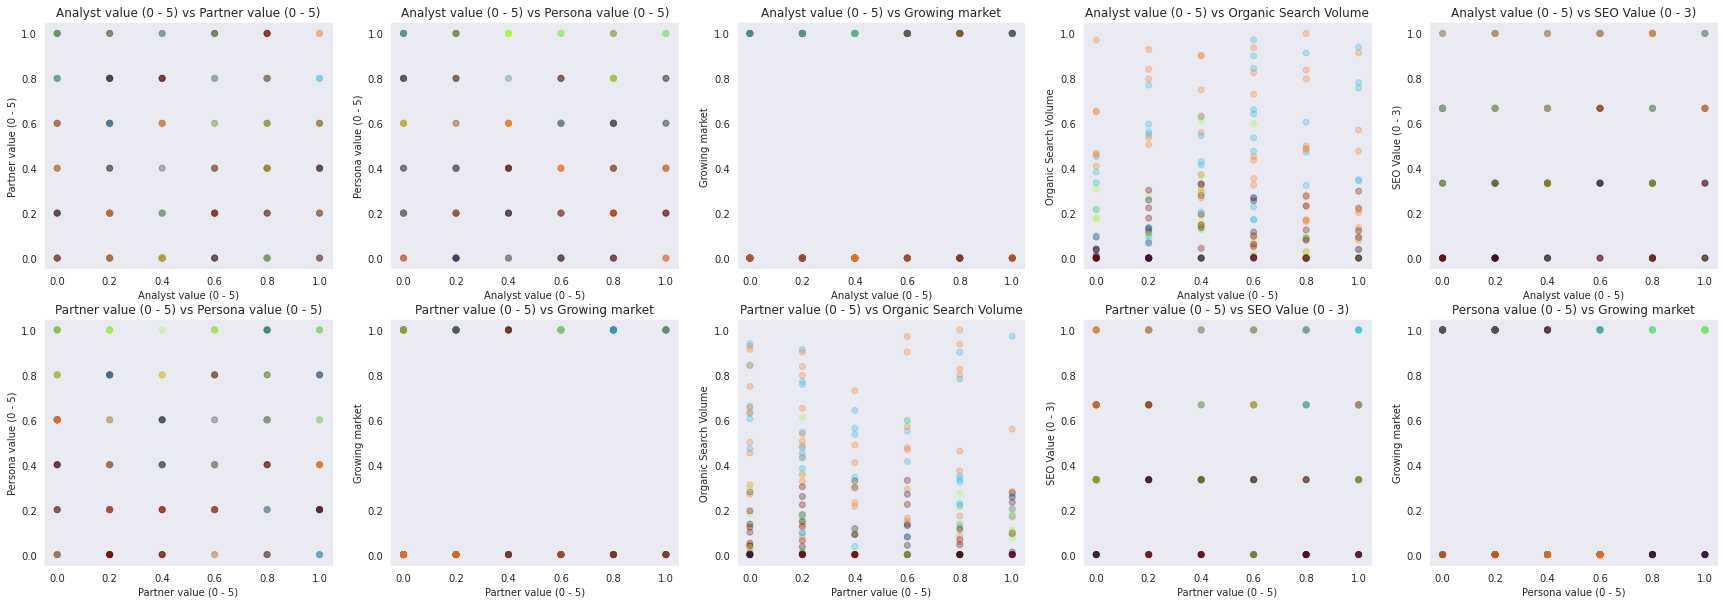

In [42]:
fig, axs = plt.subplots(2, 5, figsize = (30, 10))
axs = axs.flatten()
for cols, ax in zip(col_pairs, axs):
    ax.scatter(df_scl[cols[0]], df_scl[cols[1]], c = df_scl['Cluster'], cmap = 'turbo', alpha = 0.3)
    ax.set_title(f'{cols[0]} vs {cols[1]}')
    ax.set_xlabel(cols[0])
    ax.set_ylabel(cols[1])

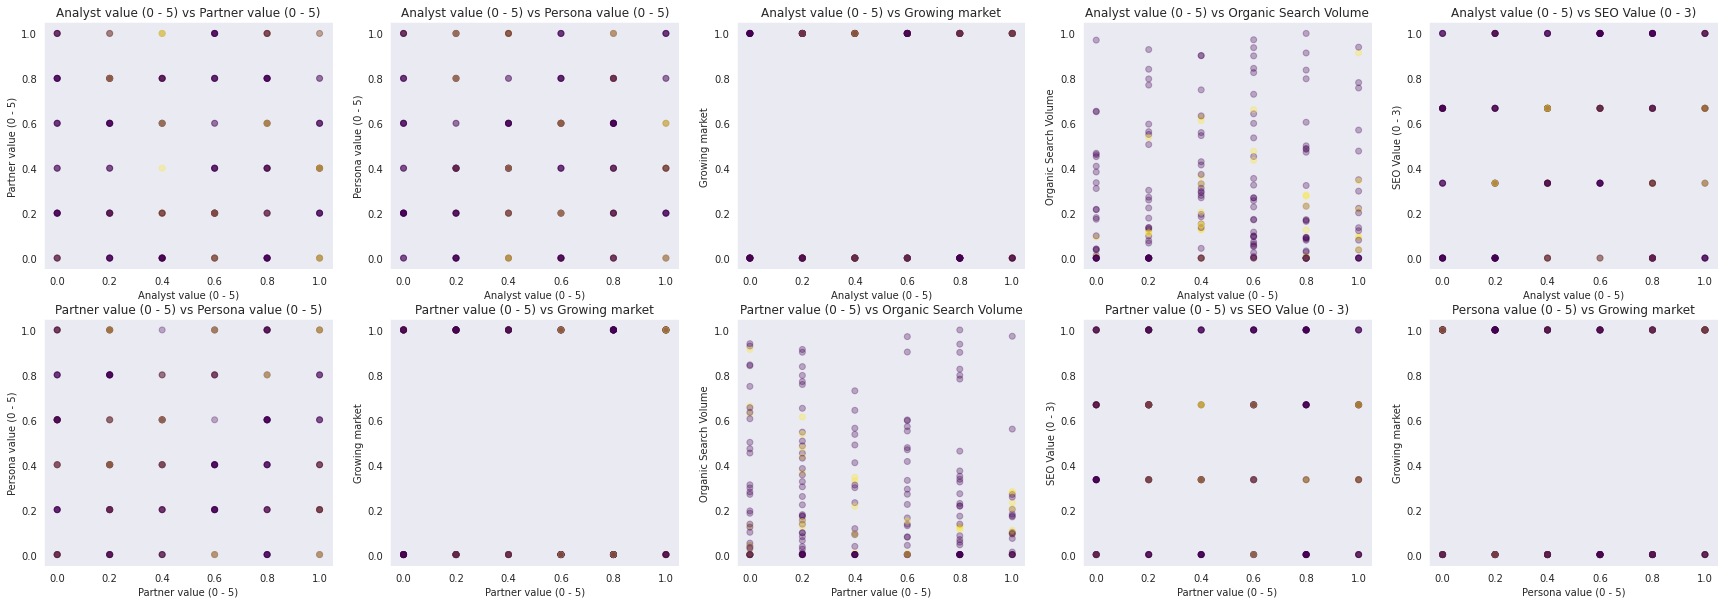

In [43]:
fig, axs = plt.subplots(2, 5, figsize = (30, 10))
axs = axs.flatten()
for cols, ax in zip(col_pairs, axs):
    ax.scatter(df_scl[cols[0]], df_scl[cols[1]], c = df_scl['serving'], cmap = 'viridis', alpha = 0.3)
    ax.set_title(f'{cols[0]} vs {cols[1]}')
    ax.set_xlabel(cols[0])
    ax.set_ylabel(cols[1])

## Proportion of already serving APIs

In [44]:
proportion_c0 = np.mean(df_scl[df_scl['Cluster'] == 0]['serving'])
proportion_c1 = np.mean(df_scl[df_scl['Cluster'] == 1]['serving'])
proportion_c2 = np.mean(df_scl[df_scl['Cluster'] == 2]['serving'])
proportion_c3 = np.mean(df_scl[df_scl['Cluster'] == 3]['serving'])
proportion_c4 = np.mean(df_scl[df_scl['Cluster'] == 4]['serving'])
print('Proportion of already serving APIs in the dataset')
print(round(np.mean(df_scl['serving']), 2))
print('Proportion of already serving APIs in each cluster')
print('Cluster 0', round(proportion_c0, 3))
print('Cluster 1', round(proportion_c1, 3))
print('Cluster 2', round(proportion_c2, 3))
print('Cluster 3', round(proportion_c3, 3))
print('Cluster 4', round(proportion_c4, 3))

Proportion of already serving APIs in the dataset
0.17
Proportion of already serving APIs in each cluster
Cluster 0 0.174
Cluster 1 0.125
Cluster 2 0.321
Cluster 3 0.154
Cluster 4 0.121


In [46]:
df_centres = pd.DataFrame(kmeans.cluster_centers_)
df_centres.columns = df_scl.columns[:-2]
df_centres.index = ['Cluster_0', 'Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4']
df_centres['Proportion of serving APIs'] = [proportion_c0, proportion_c1, proportion_c2, proportion_c3, proportion_c4]
df_centres

,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Growing market,Organic Search Volume,SEO Value (0 - 3),Proportion of serving APIs
Cluster_0,0.373913,0.460870,0.560870,-5.551115e-16,0.057304,0.188406,0.173913
Cluster_1,0.515000,0.475000,0.420000,1.000000e+00,0.451767,0.850000,0.125000
Cluster_2,0.457143,0.435714,0.907143,1.000000e+00,0.141135,0.321429,0.321429
Cluster_3,0.557692,0.446154,0.380769,-6.661338e-16,0.473133,0.826923,0.153846
Cluster_4,0.539394,0.424242,0.181818,1.000000e+00,0.087459,0.242424,0.121212


In [50]:
proportions = [proportion_c0, proportion_c1, proportion_c2, proportion_c3, proportion_c4]
x_lab = ['Cluster 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4']

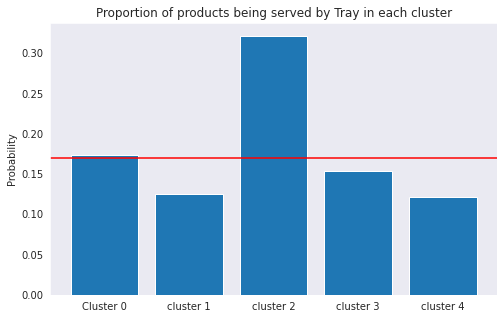

In [57]:
plt.figure(figsize=(8, 5))
plt.bar(x = x_lab, height=proportions)
plt.axhline(0.17, color = 'red')
plt.title('Proportion of products being served by Tray in each cluster')
plt.ylabel('Probability');

<AxesSubplot:>

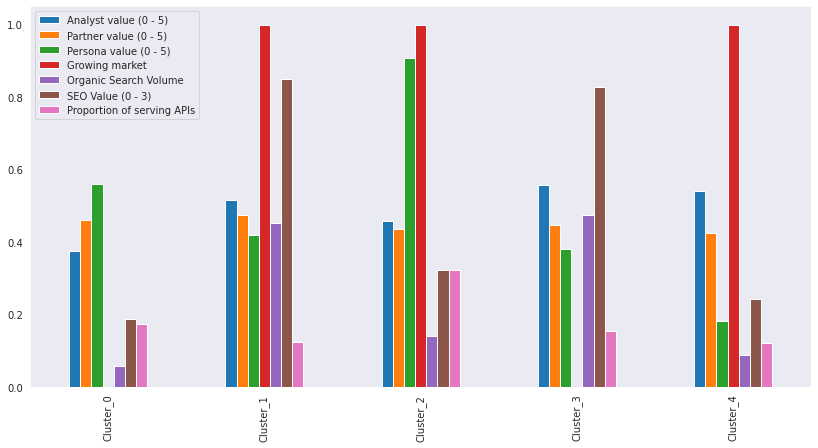

In [64]:
fig, ax = plt.subplots(1, 1, figsize = (14, 7))
df_centres.plot(kind = 'bar', ax = ax)

# K-means without growing market column

In [68]:
# minmax sclaer
X = df[['Analyst value (0 - 5)', 'Partner value (0 - 5)',
       'Persona value (0 - 5)', 'Organic Search Volume',
       'SEO Value (0 - 3)']]
mm_scaler = MinMaxScaler()
X_scl = mm_scaler.fit_transform(X)

In [69]:
df_scl = pd.DataFrame(X_scl)
df_scl.columns = X.columns
df_scl['Cluster'] = pd.Series(y_kmeans)
df_scl['serving'] = serving

In [70]:
inertia = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, 
                    random_state = 42)
    kmeans.fit(X_scl)
    inertia.append(kmeans.inertia_)

inertia_ is the sum of squared distances of samples to their closest cluster center


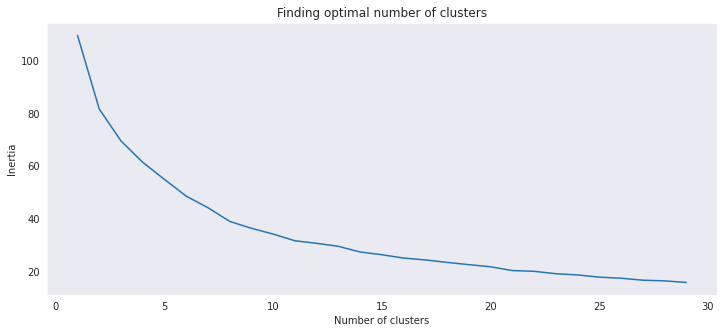

In [71]:
plt.figure(figsize = (12, 5))
plt.plot(range(1, 30),inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Finding optimal number of clusters');
print('inertia_ is the sum of squared distances of samples to their closest cluster center')

In [123]:
kmeans = KMeans(n_clusters = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(X_scl)

In [124]:
df_scl = pd.DataFrame(X_scl)
df_scl.columns = X.columns
df_scl['Cluster'] = pd.Series(y_kmeans)
df_scl['serving'] = serving

In [125]:
np.unique(np.array(df_scl['Cluster']), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 array([17, 25, 20, 20, 24, 14, 16, 18, 24, 21]))

In [126]:
n_cluster = 10
proportions = []
print('Proportion of already serving APIs in the dataset')
print(round(np.mean(df_scl['serving']), 2))
print('Proportion of already serving APIs in each cluster')
for i in range(n_cluster):
    proportion = np.mean(df_scl[df_scl['Cluster'] == i]['serving'])
    proportions.append(proportion)
    print(f'Cluster {i}', round(proportion, 3))

Proportion of already serving APIs in the dataset
0.17
Proportion of already serving APIs in each cluster
Cluster 0 0.235
Cluster 1 0.2
Cluster 2 0.15
Cluster 3 0.15
Cluster 4 0.25
Cluster 5 0.071
Cluster 6 0.25
Cluster 7 0.111
Cluster 8 0.167
Cluster 9 0.095


In [127]:
proportions

[0.23529411764705882,
 0.2,
 0.15,
 0.15,
 0.25,
 0.07142857142857142,
 0.25,
 0.1111111111111111,
 0.16666666666666666,
 0.09523809523809523]

In [225]:
pipeline = Pipeline([
    ('minmax scaler', mm_scaler),
    ('kmeans clustering', kmeans)
])

In [236]:
joblib.dump(pipeline, 'tray_minmax_kmeans_pipeline.joblib')

['tray_minmax_kmeans_pipeline.joblib']

In [227]:
X_proc.head(2)

,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Growing market,Organic Search Volume,SEO Value (0 - 3)
0,0.0,0.2,0.6,0.0,0.651150,0.666667
1,1.0,0.2,0.0,1.0,0.221537,0.666667


In [233]:
df.head(1)

,API,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Growing market,Competitive gap,Organic Search Volume,SEO Value (0 - 3)
0,15Five,0,1,3,False,False,1161,2


In [242]:
df_drop = df.drop(['Growing market', 'Competitive gap', 'API'], axis = 1)

In [253]:
a = pd.DataFrame({'a':[1],
                  'b':[2]})

In [257]:
max(df['Organic Search Volume'])

1783

In [248]:
df_drop.columns = [4,1,3,44,5]

In [249]:
pipeline.predict(df_drop)

array([7, 4, 7, 3, 8, 0, 3, 9, 2, 8, 3, 1, 8, 1, 9, 9, 4, 5, 3, 4, 4, 6,
       8, 4, 1, 8, 1, 6, 2, 9, 4, 1, 0, 3, 2, 8, 3, 2, 3, 6, 2, 6, 0, 0,
       4, 1, 0, 2, 9, 8, 7, 4, 9, 2, 5, 6, 4, 3, 2, 0, 0, 7, 4, 6, 7, 3,
       7, 9, 1, 1, 0, 6, 0, 8, 6, 8, 4, 0, 9, 3, 4, 9, 9, 0, 5, 0, 4, 8,
       2, 4, 2, 8, 1, 2, 3, 6, 7, 8, 5, 4, 3, 6, 0, 9, 9, 7, 1, 7, 2, 8,
       8, 1, 9, 3, 8, 5, 4, 5, 6, 3, 8, 7, 1, 4, 3, 4, 1, 5, 8, 9, 4, 8,
       7, 5, 1, 5, 3, 2, 2, 1, 0, 1, 2, 1, 5, 9, 7, 6, 8, 4, 1, 5, 9, 1,
       7, 8, 3, 7, 3, 0, 1, 8, 1, 8, 4, 1, 4, 6, 9, 1, 6, 9, 1, 2, 0, 8,
       2, 7, 1, 2, 4, 9, 9, 5, 8, 4, 3, 9, 5, 7, 5, 7, 3, 0, 6, 7, 6, 2,
       2], dtype=int32)

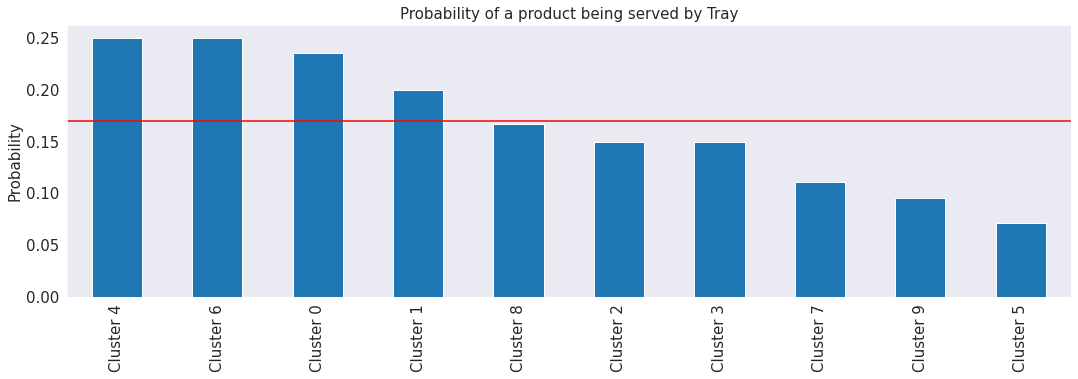

In [186]:
plt.figure(figsize=(18, 5))
df_centres.sort_values('Proportion of serving APIs', ascending = False)['Proportion of serving APIs'].plot(kind = 'bar', fontsize = 15)
plt.ylabel('Probability', fontsize=15)
plt.title('Probability of a product being served by Tray', fontsize=15)
plt.axhline(0.17, color = 'red')

In [131]:
df_centres

,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Organic Search Volume,SEO Value (0 - 3),Proportion of serving APIs,Sample_count
Cluster 0,0.200000,0.094118,0.858824,0.117581,0.294118,0.235294,17
Cluster 1,0.808000,0.392000,0.720000,0.028603,0.133333,0.200000,25
Cluster 2,0.250000,0.750000,0.150000,0.312900,0.816667,0.150000,20
Cluster 3,0.640000,0.230000,0.680000,0.662479,0.916667,0.150000,20
Cluster 4,0.808333,0.191667,0.133333,0.238129,0.666667,0.250000,24
Cluster 5,0.328571,0.842857,0.242857,0.003085,0.023810,0.071429,14
Cluster 6,0.200000,0.862500,0.912500,0.122827,0.375000,0.250000,16
Cluster 7,0.200000,0.144444,0.366667,0.545460,0.796296,0.111111,18
Cluster 8,0.775000,0.866667,0.508333,0.416363,0.791667,0.166667,24
Cluster 9,0.314286,0.238095,0.219048,0.113880,0.190476,0.095238,21


In [ ]:
df.plot()

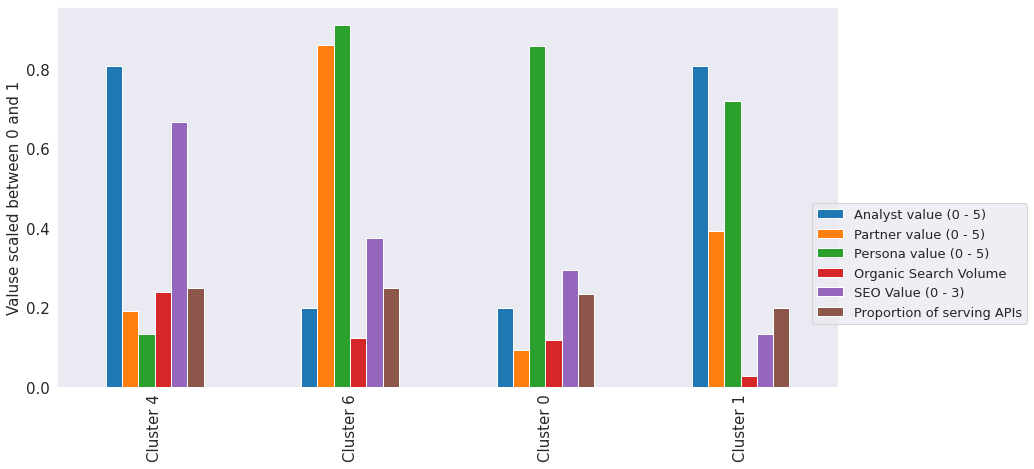

In [188]:
df_centres = pd.DataFrame(kmeans.cluster_centers_)
df_centres.columns = df_scl.columns[:-2]
df_centres.index = [f'Cluster {i}' for i in range(n_cluster)]
df_centres['Proportion of serving APIs'] = proportions
df_centres['Sample_count'] = np.unique(np.array(df_scl['Cluster']), return_counts=True)[-1]
fig, ax = plt.subplots(figsize = (14, 7))
df_centres.drop('Sample_count', axis = 1).sort_values(
    'Proportion of serving APIs', ascending = False).iloc[:4,:].plot(
    kind = 'bar', ax = ax, fontsize = 15).legend(fontsize = 13, loc='best', bbox_to_anchor=(0.75, 0., 0.5, 0.5))
plt.ylabel('Valuse scaled between 0 and 1', fontsize = 15);

In [130]:
df_centres.sort_values('Proportion of serving APIs', ascending = False)

,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Organic Search Volume,SEO Value (0 - 3),Proportion of serving APIs,Sample_count
Cluster 4,0.808333,0.191667,0.133333,0.238129,0.666667,0.250000,24
Cluster 6,0.200000,0.862500,0.912500,0.122827,0.375000,0.250000,16
Cluster 0,0.200000,0.094118,0.858824,0.117581,0.294118,0.235294,17
Cluster 1,0.808000,0.392000,0.720000,0.028603,0.133333,0.200000,25
Cluster 8,0.775000,0.866667,0.508333,0.416363,0.791667,0.166667,24
Cluster 2,0.250000,0.750000,0.150000,0.312900,0.816667,0.150000,20
Cluster 3,0.640000,0.230000,0.680000,0.662479,0.916667,0.150000,20
Cluster 7,0.200000,0.144444,0.366667,0.545460,0.796296,0.111111,18
Cluster 9,0.314286,0.238095,0.219048,0.113880,0.190476,0.095238,21
Cluster 5,0.328571,0.842857,0.242857,0.003085,0.023810,0.071429,14


- Historic data
- Future suggestion

In [160]:
np.mean(df[df['serving']]['Growing market'])

0.5294117647058824

In [164]:
df['Cluster'] = y_kmeans

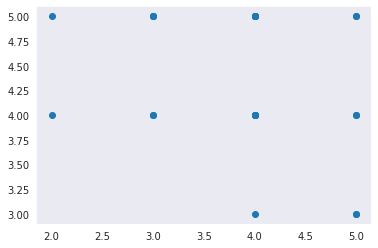

In [171]:
plt.scatter(x = df[df['Cluster'] == 8]['Analyst value (0 - 5)'], y = df[df['Cluster'] == 8]['Partner value (0 - 5)'])

In [177]:
df[df['Cluster'] == 8].style.set_properties(**{
    'font-size': '15pt',
})

,API,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Growing market,Organic Search Volume,SEO Value (0 - 3),serving,Cluster
4,ActivTrak,2,5,3,False,996,2,False,8
9,Aircall,4,5,1,True,491,1,True,8
12,Anvyl,4,5,1,False,299,2,False,8
22,Badger Maps,3,5,3,True,307,3,False,8
25,BetterWorks,5,4,5,True,622,3,False,8
35,CallTrackingMetrics,4,4,1,False,1783,3,False,8
49,Copper,4,5,1,True,414,1,True,8
73,Front,5,5,2,False,172,2,True,8
75,FullStory,4,5,4,True,163,3,False,8
87,Highspot,3,5,5,True,1733,3,False,8


# Feature Interaction

In [169]:
# All possible pairs in List 
# Using list comprehension + enumerate() 
col_pairs = [(a, b) for idx, a in enumerate(df_scl.columns[:-1]) for b in X.columns[idx + 1:]] 

In [170]:
df_ext = df_scl.copy()
df_ext = df_ext.drop(['serving','Cluster'], axis = 1)

In [171]:
df_ext

,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Growing market,Organic Search Volume,SEO Value (0 - 3)
0,0.0,0.2,0.6,0.0,0.651150,0.666667
1,1.0,0.2,0.0,1.0,0.221537,0.666667
2,0.2,0.2,0.0,1.0,0.177790,0.666667
3,0.6,0.4,0.6,1.0,0.642176,0.666667
4,0.4,1.0,0.6,0.0,0.558609,0.666667
...,...,...,...,...,...,...
194,0.0,0.8,1.0,1.0,0.335390,1.000000
195,0.2,0.2,0.2,0.0,0.797532,1.000000
196,0.6,1.0,0.8,0.0,0.255749,0.333333
197,0.0,0.8,0.2,1.0,0.217050,0.666667


In [172]:
for pair in col_pairs:
    col_name = str(pair)[2:-2]
    df_ext['mult' + col_name] = df_scl[pair[0]] * df_scl[pair[1]]
    df_ext['div' + col_name] = df_scl[pair[0]] / df_scl[pair[1]]

In [173]:
df_ext = df_ext.replace(np.nan, 0)
df_ext = df_ext.replace(np.inf, 1)
df_ext = df_ext.clip(lower = 0, upper = 1)

In [174]:
inertia = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, 
                    random_state = 42)
    kmeans.fit(df_ext)
    inertia.append(kmeans.inertia_)

inertia_ is the sum of squared distances of samples to their closest cluster center


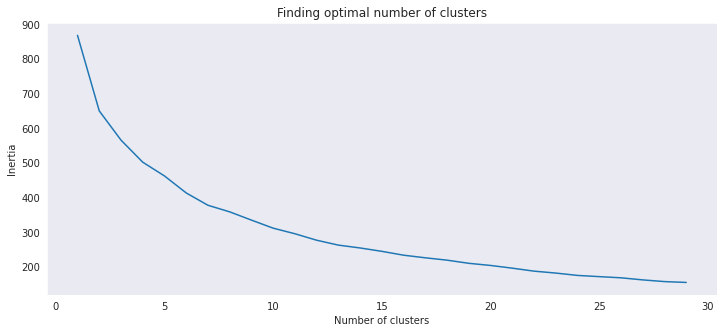

In [175]:
plt.figure(figsize = (12, 5))
plt.plot(range(1, 30),inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Finding optimal number of clusters');
print('inertia_ is the sum of squared distances of samples to their closest cluster center')

In [176]:
n_clusters = 10
kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
y_kmeans = kmeans.fit_predict(df_ext)

In [177]:
kmeans.cluster_centers_.shape

(10, 36)

In [178]:
df_ext['Cluster'] = pd.Series(y_kmeans)
df_ext['serving'] = serving

In [179]:
np.unique(np.array(df_ext['Cluster']), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 array([19, 20, 12, 17, 18, 21, 37, 13, 21, 21]))

In [180]:
print('Proportion of already serving APIs in the dataset')
print(round(np.mean(df_ext['serving']), 2))
print('Proportion of already serving APIs in each cluster')
proportions = []
for i in range(n_clusters):
    proportion_c = np.mean(df_ext[df_ext['Cluster'] == i]['serving'])
    proportions.append(round(proportion_c, 3))
    print(f'Cluster {i}', round(proportion_c, 3))

Proportion of already serving APIs in the dataset
0.14
Proportion of already serving APIs in each cluster
Cluster 0 0.263
Cluster 1 0.1
Cluster 2 0.167
Cluster 3 0.118
Cluster 4 0.0
Cluster 5 0.19
Cluster 6 0.189
Cluster 7 0.077
Cluster 8 0.048
Cluster 9 0.19


In [184]:
df_centres = pd.DataFrame(kmeans.cluster_centers_)
df_centres.columns = df_ext.columns[:-2]
df_centres.index = [f'Cluster_{i}' for i in range(n_clusters)]
#df_centres.index = ['Cluster_0', 'Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4']
df_centres['Proportion of serving APIs'] = proportions
df_centres

,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Growing market,Organic Search Volume,SEO Value (0 - 3),"multAnalyst value (0 - 5)', 'Partner value (0 - 5)","divAnalyst value (0 - 5)', 'Partner value (0 - 5)","multAnalyst value (0 - 5)', 'Persona value (0 - 5)","divAnalyst value (0 - 5)', 'Persona value (0 - 5)",...,"divPersona value (0 - 5)', 'Organic Search Volume","multPersona value (0 - 5)', 'SEO Value (0 - 3)","divPersona value (0 - 5)', 'SEO Value (0 - 3)","multGrowing market', 'Organic Search Volume","divGrowing market', 'Organic Search Volume","multGrowing market', 'SEO Value (0 - 3)","divGrowing market', 'SEO Value (0 - 3)","multOrganic Search Volume', 'SEO Value (0 - 3)","divOrganic Search Volume', 'SEO Value (0 - 3)",Proportion of serving APIs
Cluster_0,6.105263e-01,0.631579,0.652632,1.000000e+00,0.021253,0.087719,0.376842,0.762281,0.408421,8.052632e-01,...,1.000000,0.080702,1.000000,2.125336e-02,1.000000e+00,8.771930e-02,1.000000e+00,0.007084,0.063760,0.263
Cluster_1,4.800000e-01,0.060000,0.570000,0.000000e+00,0.389736,0.600000,0.028000,1.000000,0.280000,7.233333e-01,...,0.908014,0.350000,0.800000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.341391,0.482978,0.100
Cluster_2,6.000000e-01,0.033333,0.116667,7.500000e-01,0.577912,0.750000,0.020000,1.000000,0.080000,1.000000e+00,...,0.144028,0.111111,0.125000,4.362030e-01,7.500000e-01,5.277778e-01,7.500000e-01,0.493535,0.704477,0.167
Cluster_3,1.665335e-16,0.423529,0.505882,0.000000e+00,0.225826,0.490196,0.000000,0.000000,0.000000,-2.220446e-16,...,0.809218,0.203922,0.711765,2.775558e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.185279,0.291033,0.118
Cluster_4,5.555556e-02,0.588889,0.500000,1.000000e+00,0.224902,0.518519,0.033333,0.097222,0.026667,1.250000e-01,...,0.877917,0.285185,0.716667,2.249019e-01,1.000000e+00,5.185185e-01,1.000000e+00,0.163551,0.356531,0.000
Cluster_5,5.714286e-01,0.571429,0.066667,1.000000e+00,0.223727,0.571429,0.306667,0.750794,0.040000,1.000000e+00,...,0.254627,0.038095,0.147619,2.237267e-01,1.000000e+00,5.714286e-01,1.000000e+00,0.158721,0.387549,0.190
Cluster_6,5.513514e-01,0.686486,0.535135,-2.220446e-16,0.104773,0.306306,0.372973,0.707207,0.308108,8.486486e-01,...,0.935394,0.163964,0.818919,-8.326673e-17,-2.220446e-16,-1.110223e-16,-2.220446e-16,0.056843,0.220097,0.189
Cluster_7,8.000000e-01,0.630769,0.723077,1.000000e+00,0.431554,0.871795,0.492308,0.923077,0.572308,9.384615e-01,...,0.977100,0.635897,0.800000,4.315544e-01,1.000000e+00,8.717949e-01,1.000000e+00,0.382429,0.505242,0.077
Cluster_8,6.857143e-01,0.504762,0.276190,0.000000e+00,0.477526,0.825397,0.348571,0.916667,0.190476,9.880952e-01,...,0.459909,0.260317,0.300000,-2.775558e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.422794,0.582939,0.048
Cluster_9,5.142857e-01,0.095238,0.695238,1.000000e+00,0.233982,0.492063,0.038095,1.000000,0.337143,6.650794e-01,...,1.000000,0.342857,0.866667,2.339823e-01,1.000000e+00,4.920635e-01,1.000000e+00,0.154154,0.424418,0.190


In [308]:
df[df['serving']]

,API,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Growing market,Organic Search Volume,SEO Value (0 - 3),serving
5,AdRoll,2,0,5,True,226,1,True
9,Aircall,4,5,1,True,491,1,True
18,Asana,2,1,5,True,1092,2,True
23,Bamboo HR,5,2,0,False,383,2,True
29,Bizzabo,2,2,1,False,585,1,True
31,Brandfolder,4,2,4,True,13,2,True
32,Braze,2,1,5,True,650,2,True
34,Calendly,1,4,1,False,218,2,True
39,Chargify,0,5,5,False,167,2,True
49,Copper,4,5,1,True,414,1,True


# Logistic Regression

In [26]:
y = df['serving']
X = df.drop(['API', 'serving'], axis = 1)

In [27]:
print(X.shape)
print(y.shape)

(199, 6)
(199,)


In [28]:
mm_scaler = MinMaxScaler()
X_proc = mm_scaler.fit_transform(X)
X_proc = pd.DataFrame(X_proc, columns=X.columns)

In [31]:
import statsmodels.api as sm 
from statsmodels.tools.tools import add_constant
log_reg = sm.Logit(y, add_constant(X_proc)).fit()

Optimization terminated successfully.
         Current function value: 0.448389
         Iterations 6


In [32]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                serving   No. Observations:                  199
Model:                          Logit   Df Residuals:                      192
Method:                           MLE   Df Model:                            6
Date:                Sat, 20 Mar 2021   Pseudo R-squ.:                 0.01935
Time:                        17:32:13   Log-Likelihood:                -89.229
converged:                       True   LL-Null:                       -90.990
Covariance Type:            nonrobust   LLR p-value:                    0.7410
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.2540      0.631     -3.574      0.000      -3.490      -1.018
Analyst value (0 - 5)     0.8887      0.595      1.493      0.136      -0.278       2.056
Partner value (0 - 5)     0.1025      0.556      0.184      0.854      -0.987       1.192
Persona value (0 - 5)     0.4430      0.572      0.775      0.438      -0.678       1.564
Growing market            0.0577      0.382      0.151      0.880      -0.690       0.806
Organic Search Volume    -0.6306      0.972     -0.649      0.516      -2.535       1.274
SEO Value (0 - 3)         0.1530      0.714      0.214      0.830      -1.246       1.552
=========================================================================================
"""

In [66]:
df.to_csv('Tray_dataset.csv')